In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.sgdr import *
from fastai.conv_learner import *
from fastai.dataset import *
from fastai.transforms import *
from fastai.plots import *

## 1. Initial exploration

In [4]:
PATH = '../data/DigitRecognizer/'
os.listdir(PATH)

['sample_submission.csv', 'test.csv', 'train.csv']

In [5]:
df = pd.read_csv(f'{PATH}train.csv')

In [29]:
df.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Create label csv

In [36]:
i = [i for i in range(1,label.shape[0])]
d = {'ImageId':i,'Label':df.label[:-1]}
label = pd.DataFrame(d)
label.tail()

,ImageId,Label
41995,41996,0
41996,41997,1
41997,41998,7
41998,41999,6
41999,42000,9


In [37]:
label.to_csv(f'{PATH}label.csv',index = False)

## 3. Create images

### 3.1 Create training images

In [38]:
df_X = df.drop('label',axis=1)
df_X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_X.values.shape

(42000, 784)

In [50]:
X = df_X.values.reshape(-1,28,28)

In [51]:
X.shape

(42000, 28, 28)

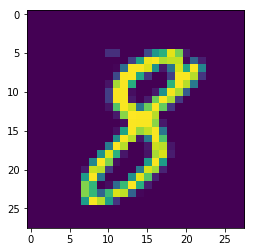

In [55]:
fig = plt.imshow(X[20])

In [60]:
trainPath = PATH+'train/'
for i in tqdm(range(0,X.shape[0])):
    name = trainPath+str(i+1)+'.png'
    plt.imsave(name,X[i])


100%|███████████████████████████████████████████████████████████████████████████| 42000/42000 [03:48<00:00, 183.71it/s]


### 3.2 Creating testing images

In [61]:
test_df = pd.read_csv(PATH+'test.csv')
test_df.shape

(28000, 784)

In [62]:
test_X = test_df.values.reshape(-1,28,28)
test_X.shape

(28000, 28, 28)

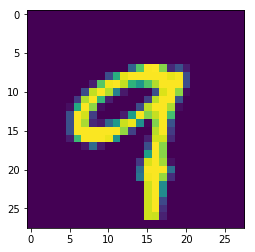

In [64]:
plt.imshow(test_X[20])

In [65]:
testPath = PATH+'test/'
for i in tqdm(range(0,test_X.shape[0])):
    name = testPath+str(i+1)+'.png'
    plt.imsave(name,test_X[i])

100%|███████████████████████████████████████████████████████████████████████████| 28000/28000 [02:13<00:00, 209.61it/s]


## 4. Create training data and learning architectures

In [67]:
val_idxs = get_cv_idxs(X.shape[0])

In [69]:
arch = resnet34
sz = 28
tfms = tfms_from_model(arch,sz)
data = ImageClassifierData.from_csv(PATH,'train', PATH+'label.csv',tfms=tfms,val_idxs= val_idxs,suffix = '.png',test_name='test')
learn = ConvLearner.pretrained(arch,data)

## 5. Training model